# Bank Marketting Subscription Prediction Project

### Business Understanding

#### **Problem Statement** 
The goal of this project is to build a predictive model that accurately determines the likelihood of a client subscribing to a term deposit based on various customer features. The bank's marketing campaigns heavily rely on effectively targeting customers who are more likely to subscribe to a term deposit. By leveraging machine learning techniques, the project seeks to improve the efficiency of these marketing campaigns and increase the conversion rate

#### **Stakeholders:**
     - Executive Officers (CEO)
     - Marketing Officers (CMO) 
     - Data Aministrators (CDA)
     
#### - We can deduce that this is a classification problem and this will inform the flow of the project that is ; the feature engeneering,the evaluation metrics, the models that are likely to work best with such a project etc 
#### - That being noted, as the project progresses, **key insights** are noted below each task performed for better project flow  

#### **Key Metrics and Success Criteria**
     1. Acuracy-The Model should have an accuracy score of 85% (On balanced data).Good models are expected to have an accuracy score of >0.80 or 80%
     2. Threshold for precision and Recall - The model should achieve a precision and recall at least 80%. This assures that the model is reliable in predicting
     3. Minimum F1 Score- The F1 score should be atleast 0.75. This balances the trade offs between precision and recalls, indicating the model performs well even if the class distribution is imbalanced
     4. AUC-ROC Score- This should be atleast 0.85. A high AUC-ROC score indicates that the model is effective in distinguishing subscribers to non subscribers
     5. Confusion Matrix - The number of False Negatives (FN) should be lower to ensure that most of the subscription cases are identified
     

   


#### Features
    
    1. 'age': 'Age of the client.',
    2. 'job': 'Type of job (e.g., admin, technician, etc.)',
    3. 'marital': 'Marital status (e.g., married, single, divorced)',
    4. 'education': 'Education level (e.g., primary, secondary, tertiary)',
    5. 'default': 'Whether the client has credit in default (yes/no)',
    6. 'balance': 'Client’s average yearly balance in euros.',
    7. 'housing': 'Whether the client has a housing loan (yes/no)',
    8. 'loan': 'Whether the client has a personal loan (yes/no)',
    9. 'contact': 'Communication type used to contact the client (e.g., cellular, telephone)',
    10. 'day': 'Last contact day of the month (numeric)',
    11. 'month': 'Last contact month of the year (e.g., Jan, Feb, etc.)',
    12. 'duration': 'Duration of the last contact in seconds.',
    13. 'campaign': 'Number of contacts performed during this campaign for this client.',
    14. 'pdays': 'Number of days since the client was last contacted (999 means client was not previously contacted).',
    15. 'previous': 'Number of contacts performed before this campaign.',
    16. 'poutcome': 'Outcome of the previous marketing campaign (e.g., success, failure, nonexistent).',
    17. 'y': 'Target variable: whether the client subscribed to a term deposit (yes/no).'
    
#### **Null Hypothesis**

#### **Alternative Hpothesis**


#### Analytical Questions
    
   

### Data Understanding

#### **Importations**

In [ ]:
import pandas as pd
import numpy as np 



#### **Load Datasets**

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [78]:
# Loading the second 2000 data
df=pd.read_csv('../data/LP2_Telco-churn-second-2000.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [79]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


#### **Merge the Train Datasets**

In [81]:
# Combine DataFrames
churn_prime = pd.concat([data, df], ignore_index=True)

churn_prime.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [82]:
# Covert all True to 'Yes' and False to 'No' for a good data consistency and analysis

churn_prime.replace(True, 'Yes', inplace=True)
churn_prime.replace(False, 'No', inplace=True)

churn_prime.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [83]:
# Change TotalCharge  datatype to float 

churn_prime['TotalCharges'] = pd.to_numeric(churn_prime['TotalCharges'], errors='coerce')

#### **Exploratory Data Analyis (EDA)**

 - Data Quality Assessment & Exploring data 

In [84]:
churn_prime.shape

(5043, 21)

In [85]:
churn_prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [86]:
# Checking for duplicates 
churn_prime.duplicated().sum() 

0

There are no duplicated rows in this dataset- This ensures data integrity and that each record represents a unique customer, which is crucial for accurate analysis and modeling

In [87]:
# Missing values with their percentages 
churn_prime.isnull().sum().to_frame('Null Count').assign(Percentage=lambda x: (x['Null Count'] / len(churn_prime)) * 100)

,Null Count,Percentage
customerID,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,269,5.334127
InternetService,0,0.000000
OnlineSecurity,651,12.908983


- We also notice we have missing values in 9 columns with 6 colmns with 12% each which is a significant amount and will need to be adressed to ensure data consistency 

In [88]:
# Columns in our combined dataset 

columns= churn_prime.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [89]:
# Unique values in each column

for column in columns:
    print(f'{column}')
    print(f'There are {churn_prime[column].unique().size} unique values')
    print(f'These are {churn_prime[column].unique()}')
    print('=' * 50)

customerID
There are 5043 unique values
These are ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
These are ['Female' 'Male']
SeniorCitizen
There are 2 unique values
These are [0 1]
Partner
There are 2 unique values
These are ['Yes' 'No']
Dependents
There are 2 unique values
These are ['No' 'Yes']
tenure
There are 73 unique values
These are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 2 unique values
These are ['No' 'Yes']
MultipleLines
There are 4 unique values
These are [None 'No' 'Yes' 'No phone service']
InternetService
There are 3 unique values
These are ['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 4 unique values
These are ['No' 'Yes' None 'No internet service']
OnlineBackup
There are 4 unique values
These

In [90]:
#Statistical  Analysis of numeric values

churn_prime.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


From the statistical analysis we can deduce the following 
- None of the columns has a mean which is equal to the median and the diffference among the two is huge (we cannot see the mode from this table). This means that our data is unevenly distributed and will not assume a bell shape (Usually an indication of evenly distributed data), when plotted- according to gaussian distribution theory. This may require transformation (e.g., log transformation) to normalize the data for certain models
- SeniorCitizen is binary (0 or 1) hence not normally distributed.
- Tenure- The distribution appears positively skewed (as will also be seen below during visualization) with a minimum tenure of 0 months (possibly indicating new customers)
- Monthly Charges- The distribution shows variability, and also not balanced 
- Total Charges- The distibution is positively skewed 

In [91]:
# Overview Analysis of categorical columns 

churn_prime.describe(include= 'object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,4774,3,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,3,No,2507
OnlineBackup,4392,3,No,2231
DeviceProtection,4392,3,No,2219


#### **EDA**  (Exploratory Data Analysis)

#### **1. Numerical Columns EDA**

#### **Univariate Analysis**

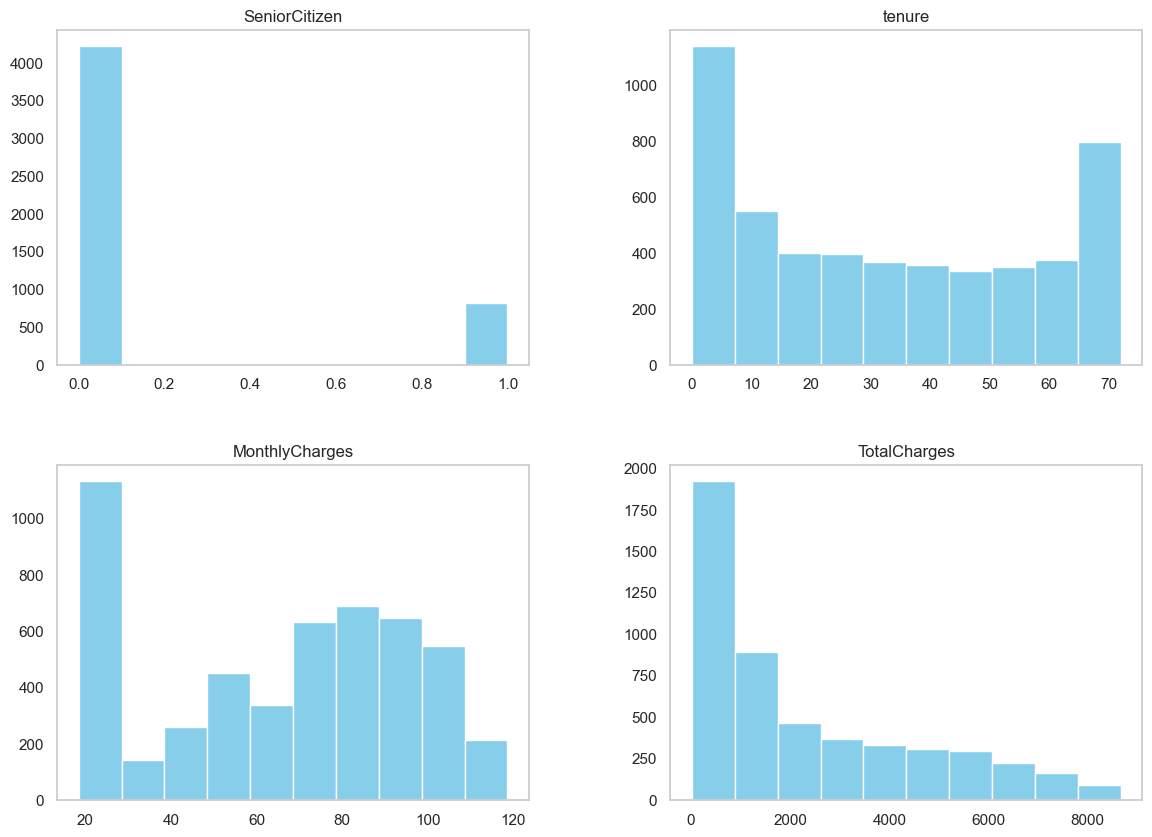

In [92]:
# Distribution of Numerical Feature
churn_prime.hist(figsize= (14,10),grid=False, color='skyblue')
plt.show()

- Used a histogram to see the ditribution of our data and its unevenly distributed-Proof of what we could pick from the statistical analysis- and as per the visuals, 3 graphs are bimodal (having two curves or 2 major bends) instead of havig one curve like a bell shape and the total charge being unimodal with a long tail as also seen below in the kde plots. 

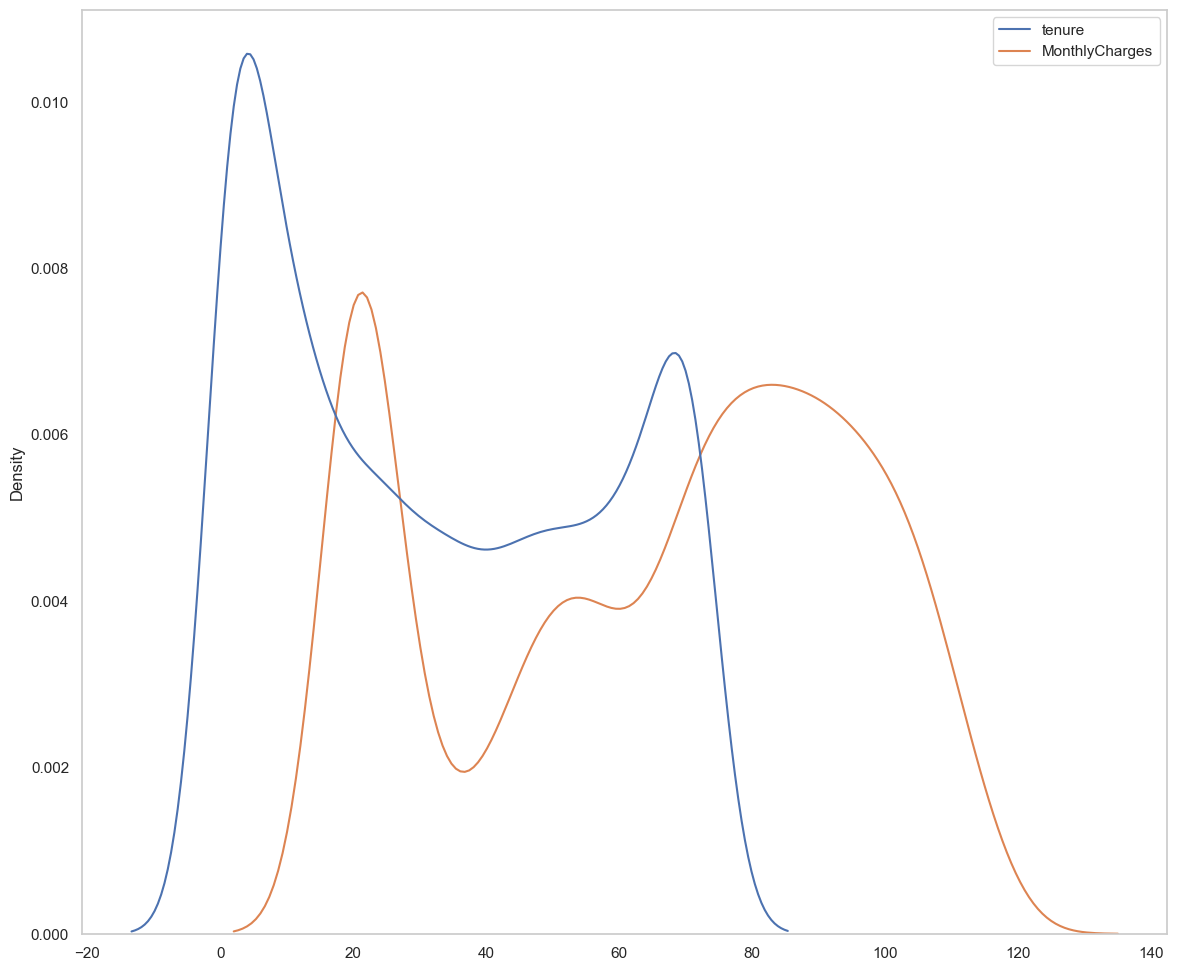

In [93]:
# Create a figure with the specified size
plt.figure(figsize=(14,12))
sns.kdeplot(churn_prime.drop(['SeniorCitizen','TotalCharges'], axis=1), color='skyblue')
plt.grid(False)
plt.show()

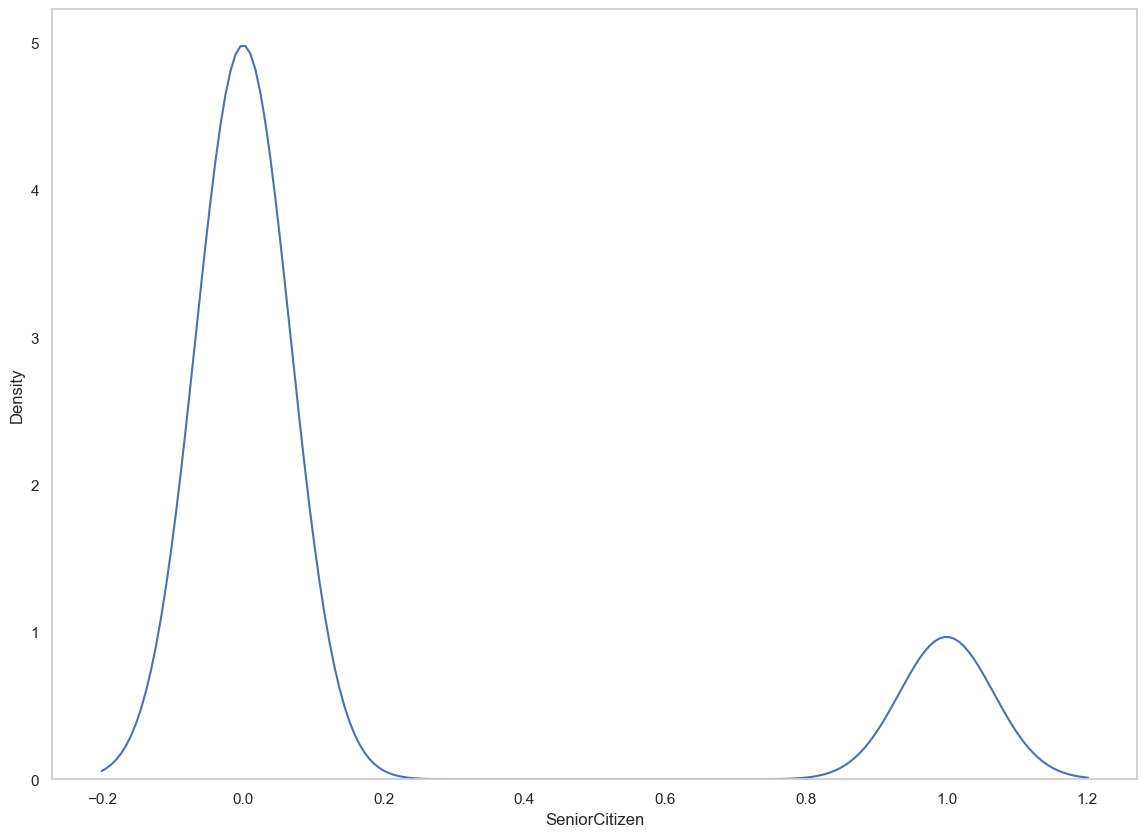

In [94]:
plt.figure(figsize=(14,10))
sns.kdeplot(churn_prime['SeniorCitizen'])
plt.grid(False)
plt.show()

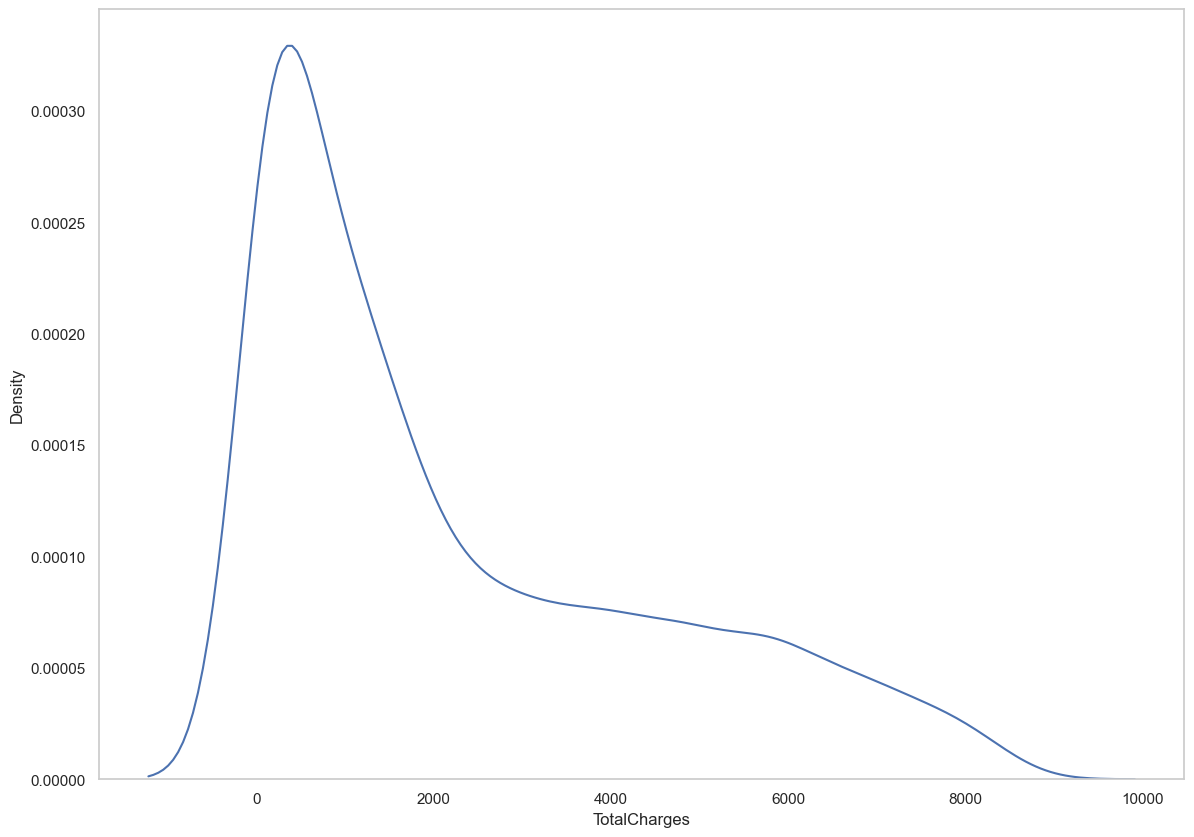

In [95]:
plt.figure(figsize=(14,10))
sns.kdeplot(churn_prime['TotalCharges'])
plt.grid(False)
plt.show()

- The kde plot also concurs with previous findings on distribution and also in the  Total charge we can spot  a long tail suggesting that we could also have outliers in the data 

#### Checking for Outliers

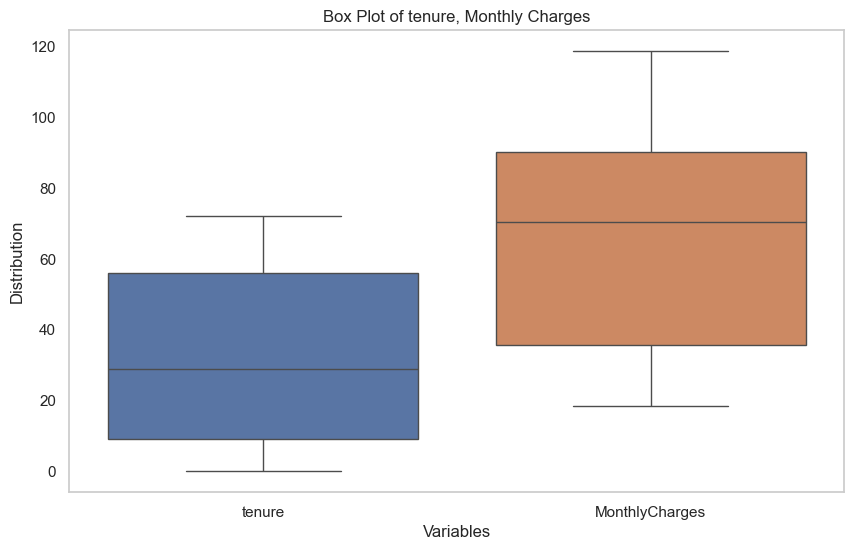

In [96]:
# Create a box plot for multiple columns
plt.figure(figsize=(10, 6))
sns.boxplot(churn_prime[['tenure', 'MonthlyCharges']],  whis=1.5)

# Add titles and labels
plt.title('Box Plot of tenure, Monthly Charges')
plt.xlabel('Variables')
plt.ylabel('Distribution')

plt.grid(False)

# Display the plot
plt.show()


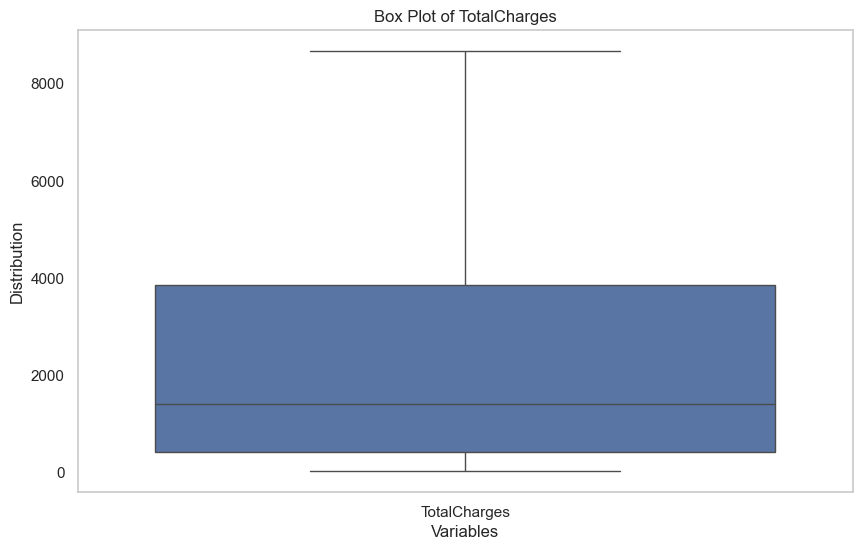

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(churn_prime[['TotalCharges']],  whis=4.5)
 
# Add titles and labels
plt.title('Box Plot of TotalCharges')
plt.xlabel('Variables')
plt.ylabel('Distribution')
 
plt.grid(False)
 
# Display the plot
plt.show()

- Although the box plot is not able to capture extreme values, we can see in the KDE plot a long tail suggesting the presence of outliers in our dataset. Additionally, from the statistical analysis, the large standard deviation and the difference between the mean and median for TotalCharges further indicate that there are significant variations in the data, which likely include outliers. This will inform the decison moving forward we can consider using robust scaller and not minmax which is sensitive to outliers.

#### **Bivariate Analysis**

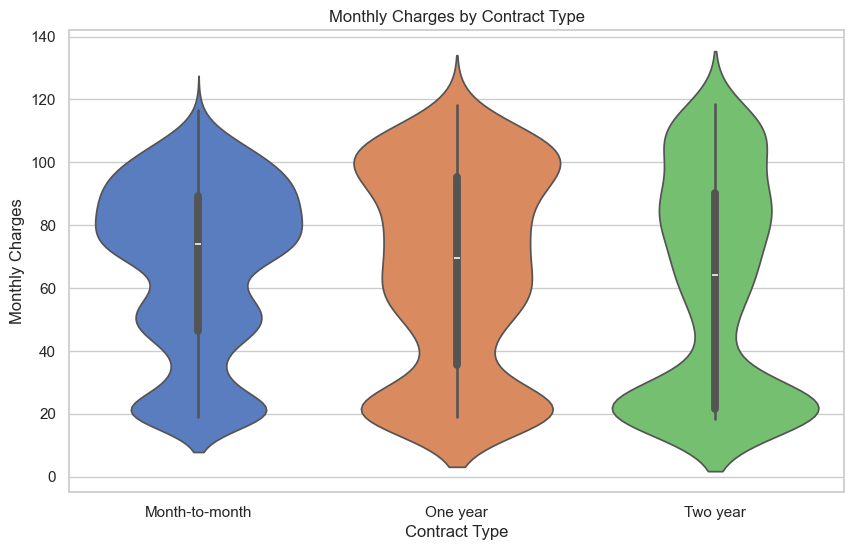

In [98]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Contract', y='MonthlyCharges', data=churn_prime, palette='muted')
plt.title('Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()


- From the violin plots above, we can deduce that customers on month to month contract pay higher monthly charge. While For One year contact type  we have a group that pays a significantly lower monthly charge amount but the majority in this group paying a higer monthly charge and For the two year contract we have a majority paying significantly lower monthly charges this is as per the density distribution 
- As per the median value, it higher on the month to month and reduces as we move toward two year contract type also showing that pople i month to month pay higher monthly charges than those in two years contract type. 

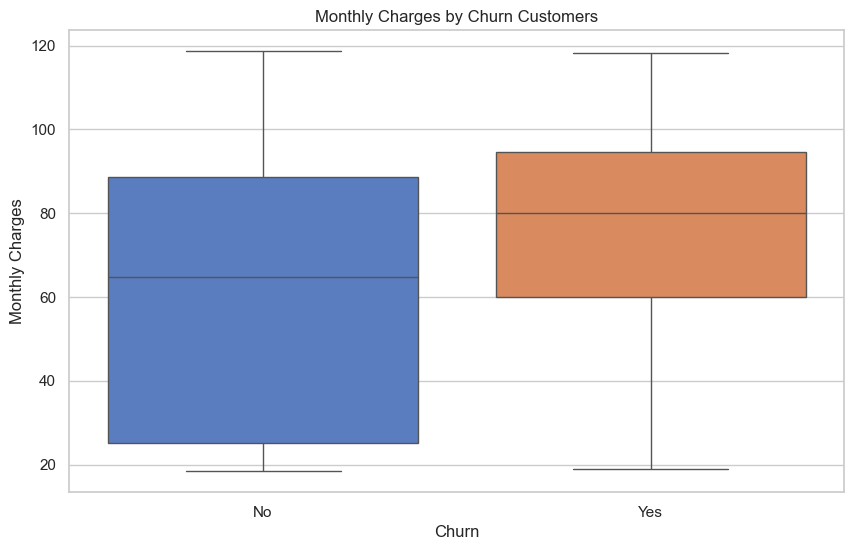

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn_prime, palette='muted')
plt.title('Monthly Charges by Churn Customers')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


- From the above boxplot, Higher monthly charges are associated with increased customer churn, but there's significant overlap in charges between churned and non-churned customers, suggesting other factors also influence churn.

#### **Maltivariate Analysis**

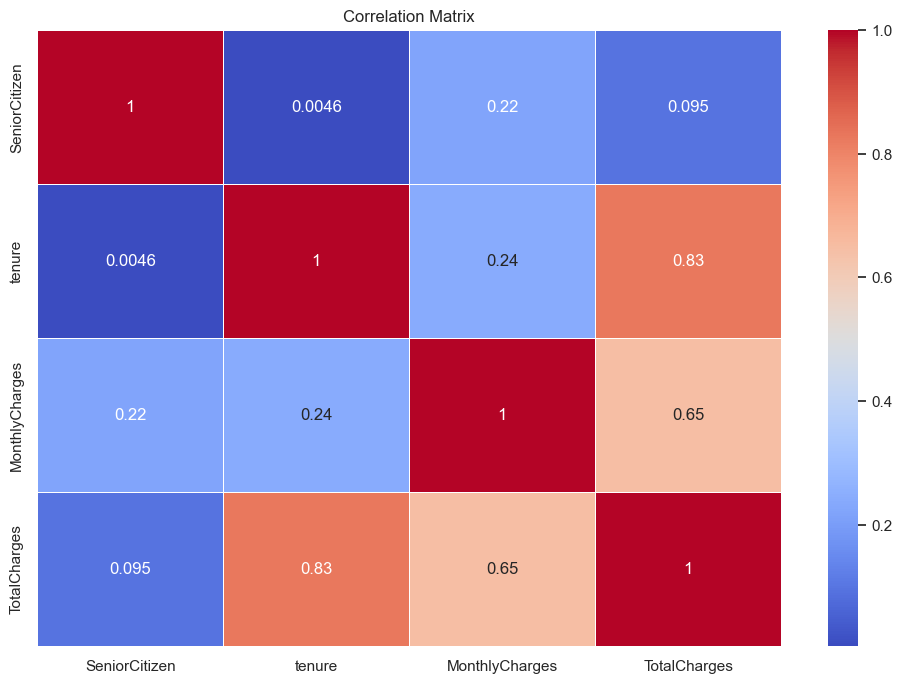

In [100]:
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

numeric_df = churn_prime.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From this corelation matrix we can deduce the folowing :
- The strongest correlation (0.83) is between tenure and total charges, indicating that longer-term customers tend to have higher total charges.
- Monthly charges and total charges have a moderately strong correlation (0.65), which is expected as higher monthly charges would contribute to higher total charges.
- There's a weak positive correlation (0.24) between tenure and monthly charges, suggesting that longer-term customers may have slightly higher monthly rates.
- The "Senior Citizen" variable has very weak correlations with other variables, with the strongest being a weak positive correlation (0.22) with monthly charges.
- Tenure and total charges show the weakest correlation (0.0046) with the Senior Citizen variable, suggesting that being a senior citizen has little to no relationship with how long a customer stays or their total spending.

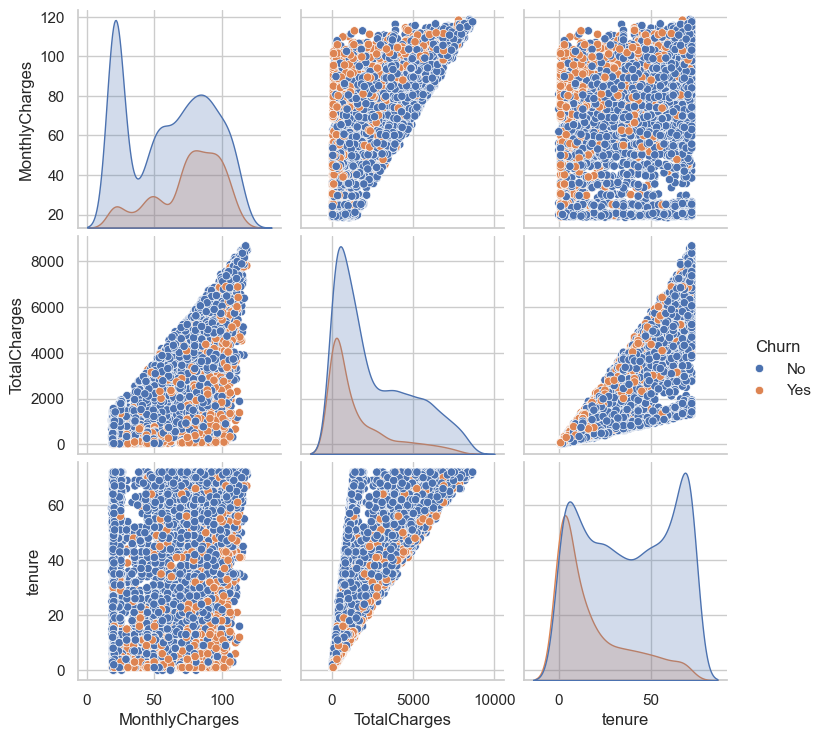

In [101]:
sns.pairplot(churn_prime[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']], hue='Churn')
plt.show()

Unlike the correlation matrix, Pair plot bring in churn into the picture. And we can see the relataionship between the numerical variables and deduce the following ;
- MonthlyCharges vs Churn- Higher monthly charges are associated with a higher likelihood of churn (more orange dots at higher values).
- TotalCharges vs Churn- There's a less clear relationship, but churned customers (orange) seem slightly more concentrated at lower total charges.
- Tenure vs Churn- Customers with shorter tenure are more likely to churn (more orange dots at lower tenure values)
- MonthlyCharges vs TotalCharges- Strong positive correlation, as expected
- Tenure vs TotalCharges- Positive correlation; longer tenure generally means higher total charges
- MonthlyCharges vs Tenure- Weak positive relationship; slight tendency for longer-tenured customers to have higher monthly charges
- Churn patterns- Churned customers (orange) are more prevalent in areas of high monthly charges, low total charges, and low tenure
- On distribution
                - MonthlyCharges has Multimodal distribution
                - TotalCharges is Right-skewed
                - Tenure has Bimodal distribution with peaks at low and high values

#### **2. Categorical Columns EDA**

#### **Distribution and Counts for Categorical variables**

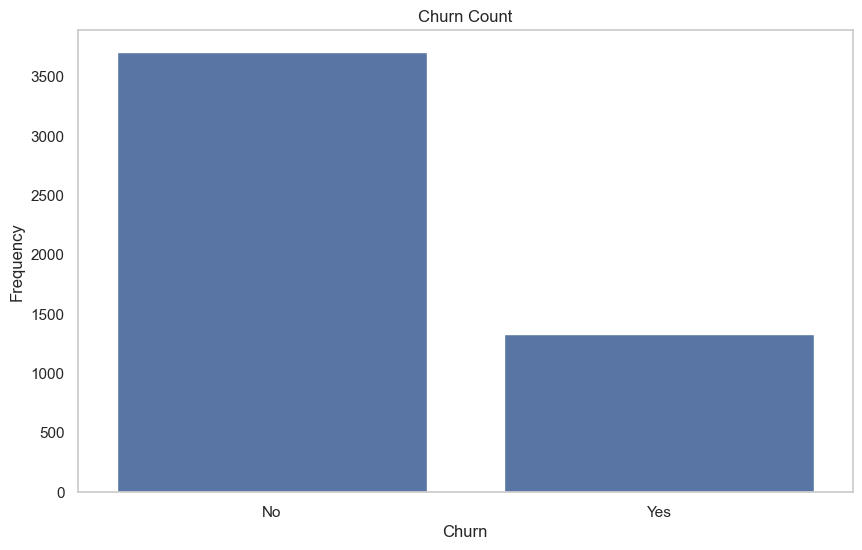

In [102]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(churn_prime, x='Churn', order=churn_prime['Churn'].value_counts().index)

# Add titles and labels
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

- The Churn column is imbalanced (we have class imbalance), with more 'No' than 'Yes' values. This affects model training, leading to biased predictions. Consider using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights to balance the dataset during model training.

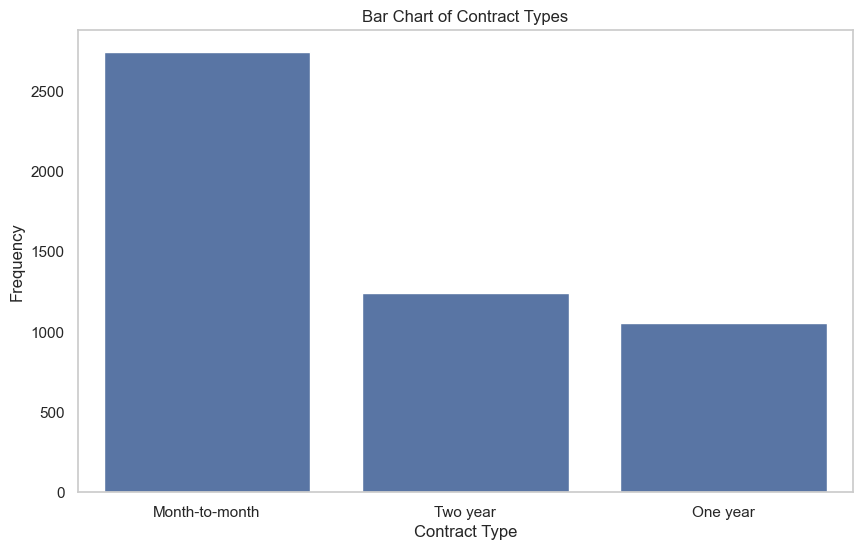

In [103]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(churn_prime, x='Contract', order=churn_prime['Contract'].value_counts().index)

# Add titles and labels
plt.title('Bar Chart of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

* For the contracts column which will be our focus for the hypothesis we did a bar plot- and realise most customers are on the month to month subscription contract

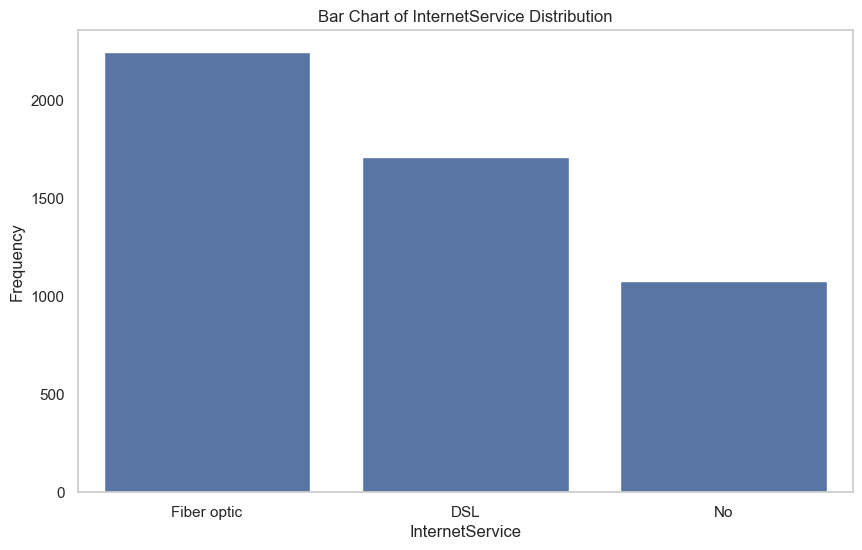

In [104]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(churn_prime, x='InternetService', order=churn_prime['InternetService'].value_counts().index)

# Add titles and labels
plt.title('Bar Chart of InternetService Distribution')
plt.xlabel('InternetService')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

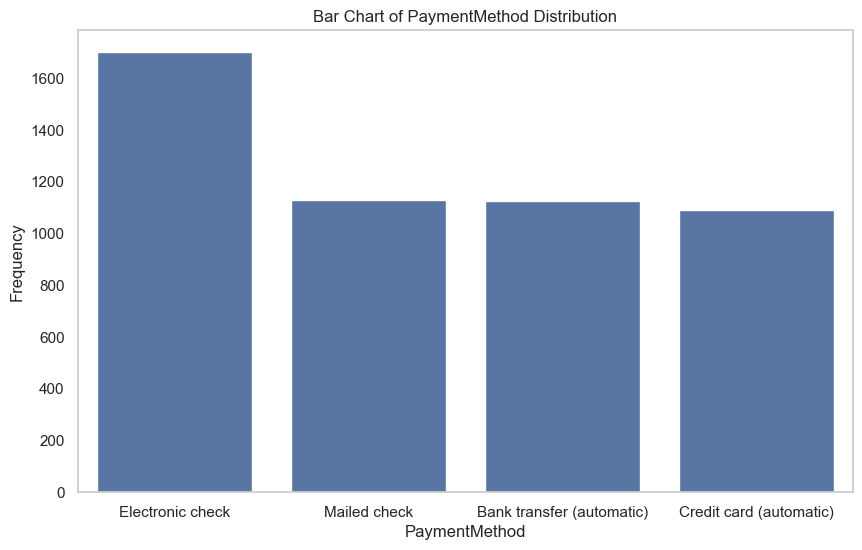

In [105]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(churn_prime, x='PaymentMethod', order=churn_prime['PaymentMethod'].value_counts().index)

# Add titles and labels
plt.title('Bar Chart of PaymentMethod Distribution')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

#### **Hypothesis Testing**

##### Null Hypothesis
 ##### (HO) There is no significant difference in churn rates among customers with different contract types.
##### Alternative Hpothesis
##### (H1) There is a significant difference in churn rates among customers with different contract types.

In [106]:
# Create a copy of the original DataFrame
df_train_chi = churn_prime.copy()

# Drop the row with the unknown value from the Churn column
df_train_chi.drop(index=2988, inplace=True)
df_train_chi.reset_index(drop=True, inplace=True)

# Drop 'customerID' column as it is not needed for analysis
df_train_chi.drop(columns=['customerID'], axis=1, inplace=True)

# Convert Churn to binary
df_train_chi['Churn'] = df_train_chi['Churn'].map({'Yes': 1, 'No': 0})

# Replace invalid TotalCharges with NaN
df_train_chi['TotalCharges'] = pd.to_numeric(df_train_chi['TotalCharges'], errors='coerce')

# Define numerical and categorical columns
num_columns = df_train_chi.select_dtypes(include=['number']).columns
cat_columns = df_train_chi.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
imputer_num = SimpleImputer(strategy='median')
df_train_chi[num_columns] = imputer_num.fit_transform(df_train_chi[num_columns])

# Impute missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_train_chi[cat_columns] = imputer_cat.fit_transform(df_train_chi[cat_columns])

# Create contingency table for Churn and Contract
contingency_table = pd.crosstab(df_train_chi['Churn'], df_train_chi['Contract'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Square Test")
print("----------------")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Interpret the result based on the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: This means there is a significant difference in churn rates among customers with different contract types.")
else:
    print("Fail to reject the null hypothesis: This means there is no significant difference in churn rates among customers with different contract types.")


Chi-Square Test
----------------
Chi-Square Statistic: 881.6208905118242
P-value: 3.61789584641233e-192
Degrees of Freedom: 2
Reject the null hypothesis: This means there is a significant difference in churn rates among customers with different contract types.


- The chi-square test was utilized to examine whether there are significant variations in churn rates based on different contract types within the Telco dataset
- With a chosen significance level (alpha) of 0.05, the extremely low p-value (3.62e-192) obtained from the test indicates a robust rejection of the null hypothesis.
- Consequently, we reject the null hypothesis that there is no significant difference in churn rates across various contract types.
- This statistical finding provides compelling evidence that contract type plays a critical role in influencing churn rates among Telco customers.

#### **Answering Analytical Questions**

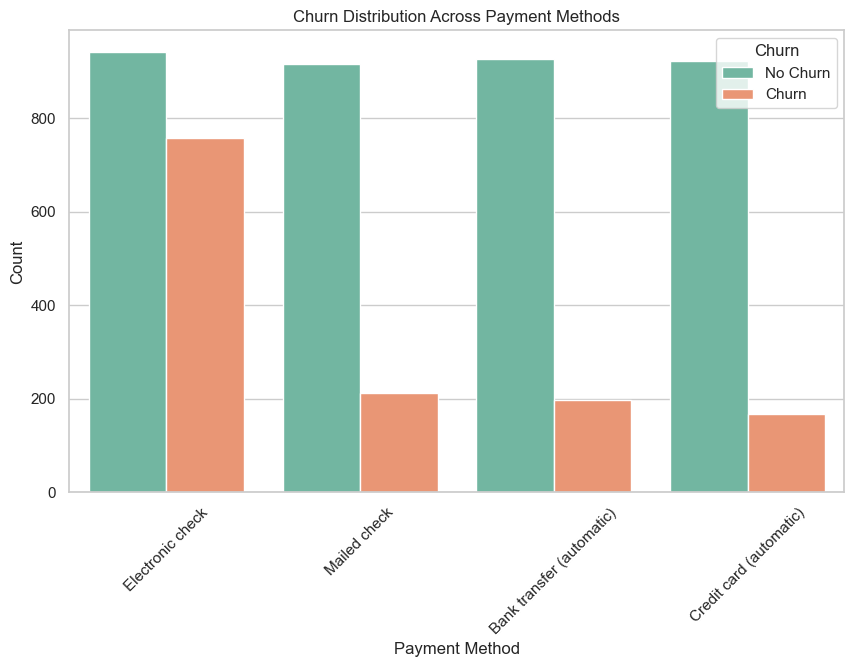

In [107]:
# Q1. How is Churn distributed across the different payment methods

# Countplot of churn across payment methods
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=churn_prime, palette='Set2')
plt.title('Churn Distribution Across Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

- We notice across all the payment methods those who churned were more than those who did not churn with not much different on churned customers across the different payment methods

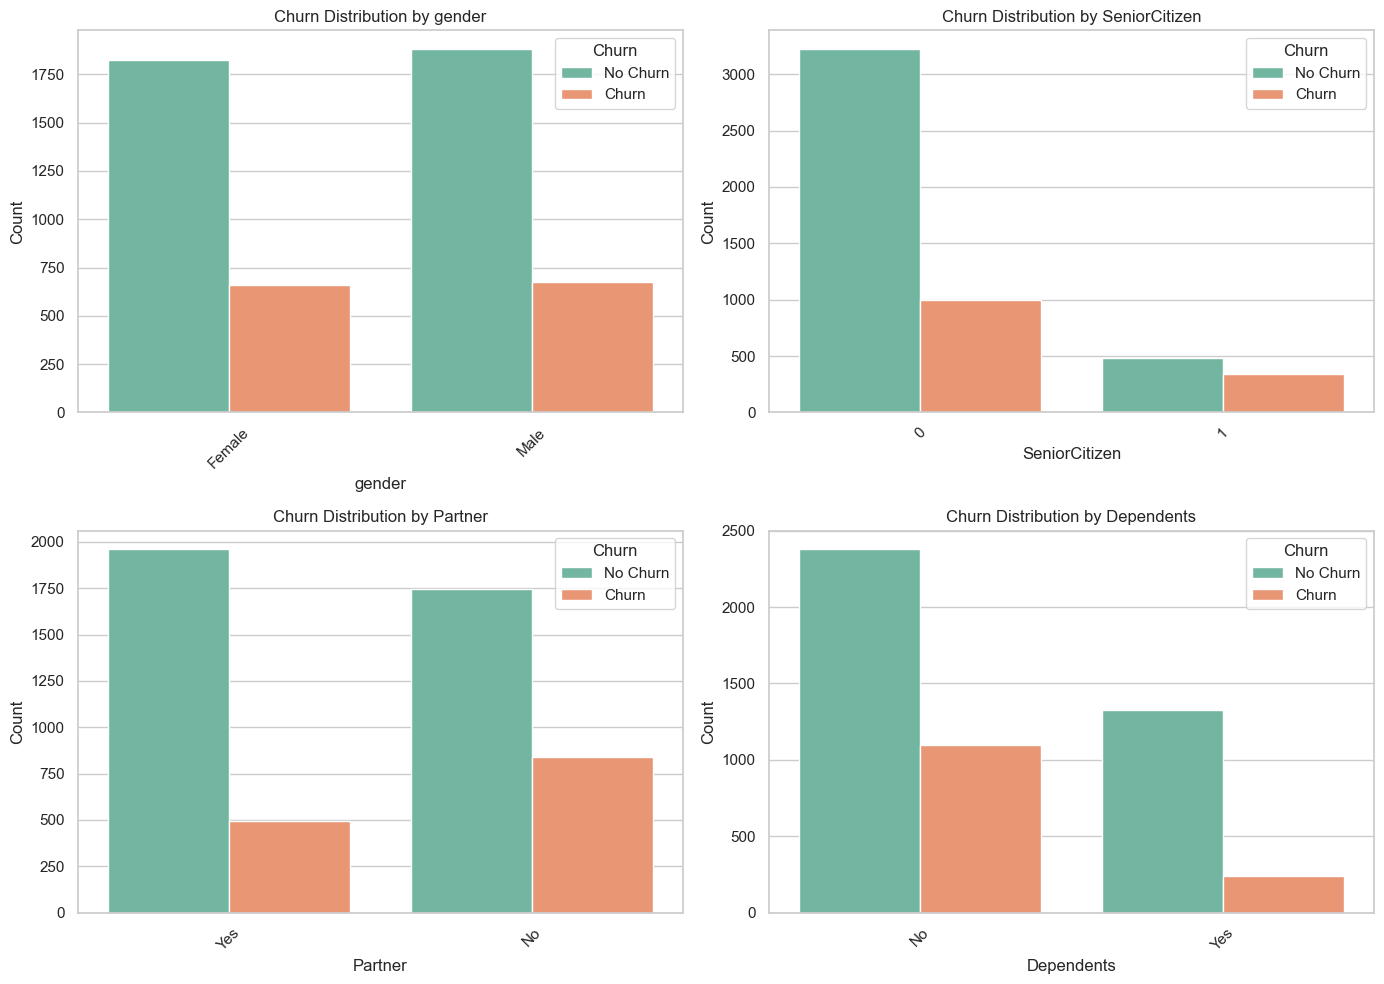

In [108]:
# Q2  Explore how demographic factors relate to churn 

# Define categorical variables related to demographics
demographic_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Plotting demographic factors against churn
plt.figure(figsize=(14, 10))
for i, var in enumerate(demographic_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='Churn', data=churn_prime, palette='Set2')
    plt.title(f'Churn Distribution by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])

plt.tight_layout()
plt.show()


- Gender and Churn:
  Both male and female customers have similar churn patterns.
  There is a slightly higher count of male customers, but the churn rate does not significantly differ between genders.
- Senior Citizen and Churn:
  A higher proportion of senior citizens (1) churn compared to non-senior citizens (0).
  Non-senior citizens have a significantly higher count of no churn, suggesting they are more likely to stay with the service.
- Partner and Churn:
  Customers without a partner are more likely to churn compared to those with a partner.
  The presence of a partner seems to have a positive influence on customer retention.
- Dependents and Churn:
  Customers without dependents show a higher churn rate compared to those with dependents.
  Having dependents appears to correlate with a lower churn rate, indicating better retention among these customers.
- These insights suggest that certain demographic factors like being a senior citizen, not having a partner, and not having dependents are associated with higher churn rates.

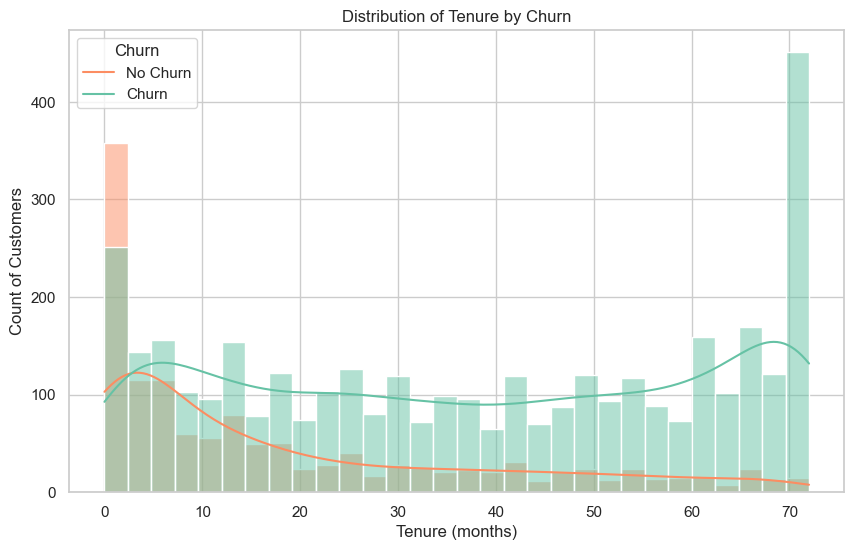

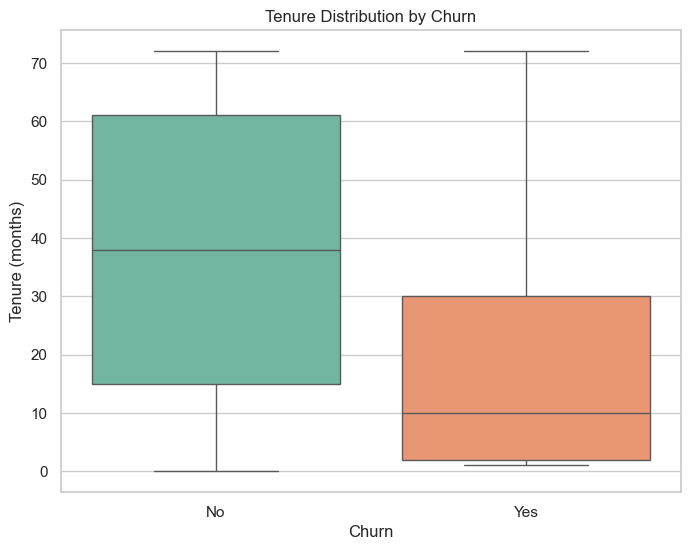

In [109]:
# Q3 How does the tenure of a customer impact their likelihood of churning?

# Histograms of tenure by churn
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_prime, x='tenure', hue='Churn', kde=True, bins=30, palette='Set2')
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Count of Customers')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

# Boxplot of tenure by churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=churn_prime, palette='Set2')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()


- The graph shows that the number of churned customers (green line) is higher in the initial months of tenure and decreases over time. Conversely, the non-churned customers (Brownish line) are fewer initially and also decrease slightly over time but remain relatively lower compared to the churned customers. This indicates that most customers tend to churn early, and those who stay longer are less likely to churn, but the overall number of churned customers is higher
- The boxplot proves the above to be true 

In [110]:
# Q4 Is there a significant relation between the type of internet service and customer churn and at what rate?

# Group by InternetService and count churn
internet_churn_counts = churn_prime.groupby('InternetService')['Churn'].value_counts().unstack()

# Display the counts
print("Churn counts by Internet Service:")
print(internet_churn_counts)


Churn counts by Internet Service:
Churn              No  Yes
InternetService           
DSL              1406  309
Fiber optic      1296  951
No               1004   76


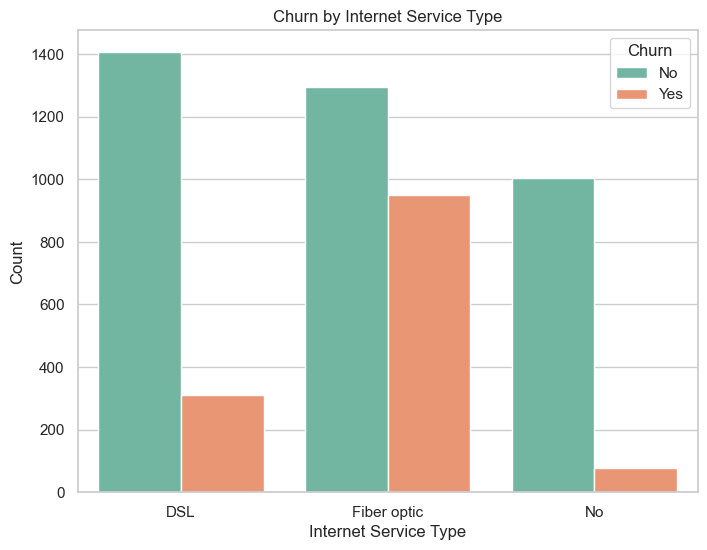

In [111]:
# Bar plot of churn by InternetService
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=churn_prime, palette='Set2')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()


<Figure size 1000x600 with 0 Axes>

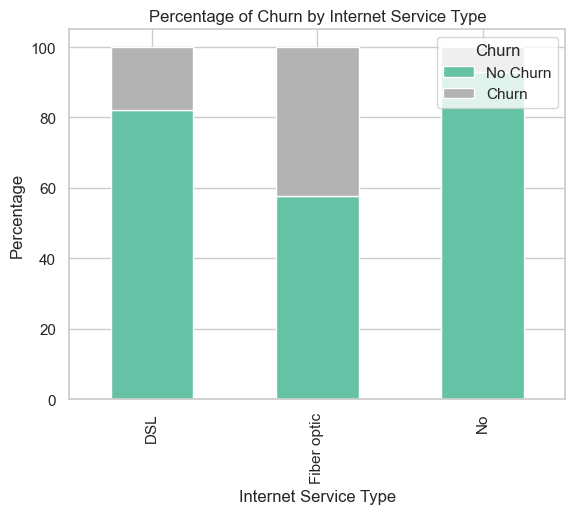

In [112]:
# Calculate percentages
internet_churn_percentages = internet_churn_counts.div(internet_churn_counts.sum(axis=1), axis=0) * 100

# Plot percentage stacked bar chart
plt.figure(figsize=(10, 6))
internet_churn_percentages.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Percentage of Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()


- There appears to be a significant relationship between internet service type and customer churn:

-DSL has the lowest churn rate at about 20%

-Fiber optic has a much higher churn rate of around 40-45%

-No internet service has the highest churn rate at approximately 60%

- The data suggests that the type of internet service is correlated with customer retention, with DSL customers being most likely to stay and those without internet service most likely to churn.

In [113]:
#Q5. Do customers with multiple services (e.g., phone service, internet service) show different churn rates compared to those with  fewer services?

# Create a new feature indicating whether the customer has multiple services
churn_prime['MultipleServices'] = churn_prime.apply(lambda x: 'Multiple Services' if (x['PhoneService'] == 'Yes' and 
                                                                                      (x['InternetService'] == 'DSL' or 
                                                                                       x['InternetService'] == 'Fiber optic')) else 'Fewer Services', axis=1)

# Group by MultipleServices and count churn
services_churn_counts = churn_prime.groupby('MultipleServices')['Churn'].value_counts().unstack()

# Display the counts
print("Churn counts by Service Category:")
print(services_churn_counts)


Churn counts by Service Category:
Churn                No   Yes
MultipleServices             
Fewer Services     1373   196
Multiple Services  2333  1140


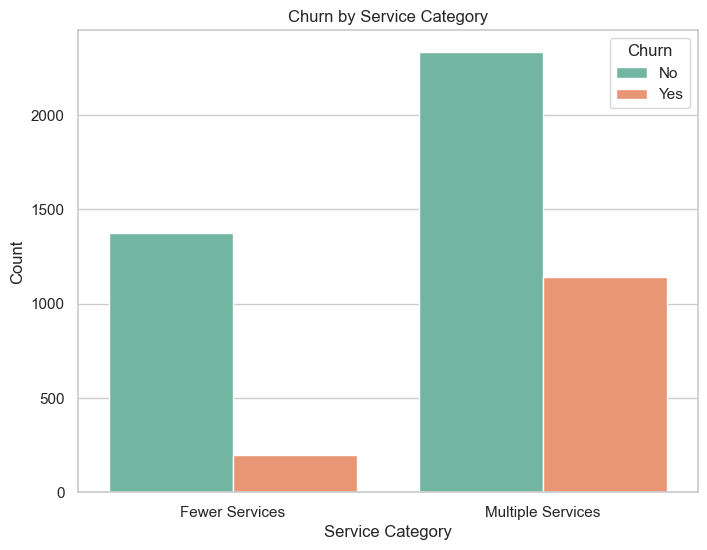

In [114]:
# Bar plot of churn by MultipleServices
plt.figure(figsize=(8, 6))
sns.countplot(x='MultipleServices', hue='Churn', data=churn_prime, palette='Set2')
plt.title('Churn by Service Category')
plt.xlabel('Service Category')
plt.ylabel('Count')
plt.show()


<Figure size 1000x600 with 0 Axes>

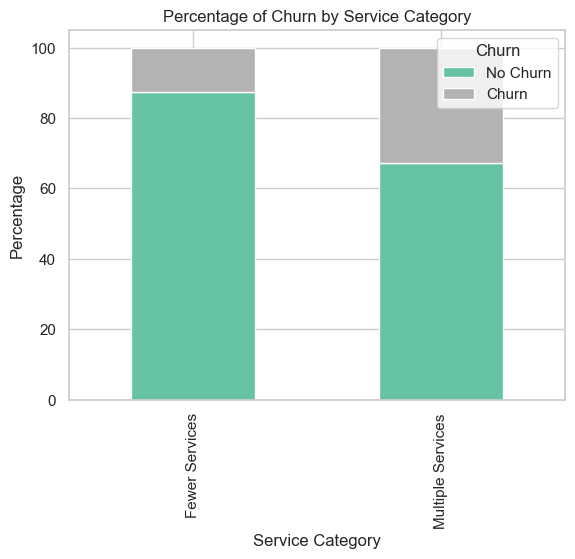

In [115]:
# Calculate percentages
services_churn_percentages = services_churn_counts.div(services_churn_counts.sum(axis=1), axis=0) * 100

# Plot percentage stacked bar chart
plt.figure(figsize=(10, 6))
services_churn_percentages.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Percentage of Churn by Service Category')
plt.xlabel('Service Category')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()


-  customers with multiple services show a higher churn rate compared to those with fewer services:

-Customers with fewer services (labeled as "Fewer Services") have a lower churn rate of approximately 12-15%

-Customers with multiple services have a significantly higher churn rate of about 32-35%

- This data suggests that customers subscribed to multiple services are more likely to churn than those with fewer services.

In [116]:
#Q6 How do different contract types affect customer churn rates?

# Group by Contract type and calculate the churn rate
contract_churn_counts = churn_prime.groupby('Contract')['Churn'].value_counts().unstack()
contract_churn_rates = contract_churn_counts.div(contract_churn_counts.sum(axis=1), axis=0) * 100

# Display the counts and rates
print("Churn counts by Contract Type:")
print(contract_churn_counts)
print("\nChurn rates by Contract Type:")
print(contract_churn_rates)

Churn counts by Contract Type:
Churn             No   Yes
Contract                  
Month-to-month  1560  1184
One year         933   122
Two year        1213    30

Churn rates by Contract Type:
Churn                  No        Yes
Contract                            
Month-to-month  56.851312  43.148688
One year        88.436019  11.563981
Two year        97.586484   2.413516


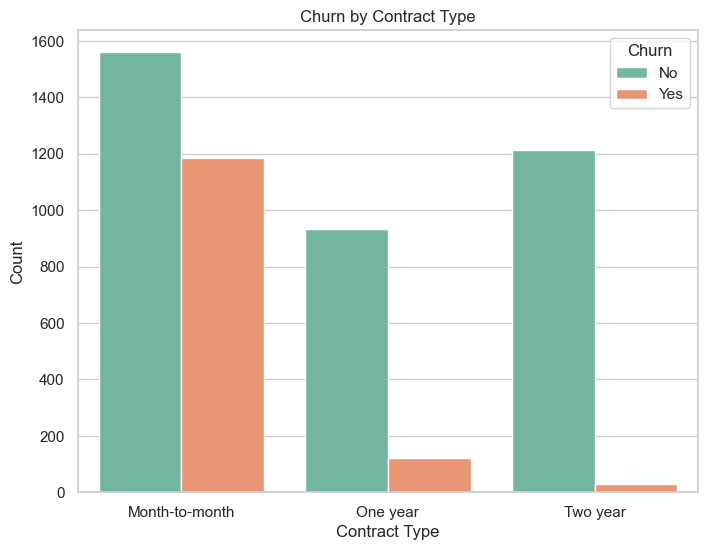

In [117]:
# Bar plot of churn by Contract type
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=churn_prime, palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


<Figure size 1000x600 with 0 Axes>

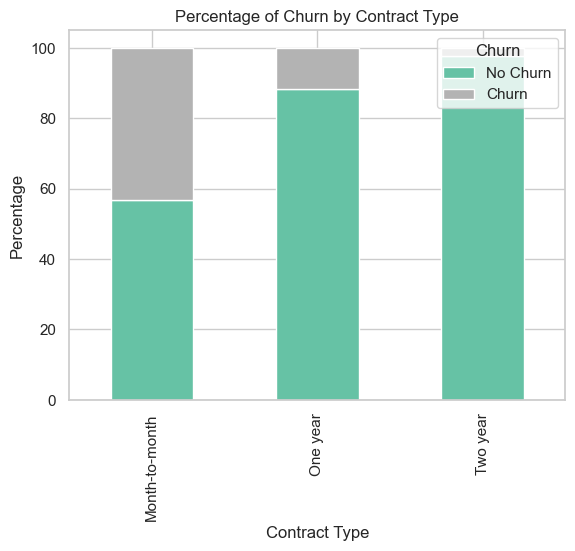

In [118]:
# Plot percentage stacked bar chart
plt.figure(figsize=(10, 6))
contract_churn_rates.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Percentage of Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()


- Contract types significantly affect churn rates:

-Month-to-month contracts have the highest churn rate at about 43%

-One-year contracts show a much lower churn rate of approximately 12%

-Two-year contracts have the lowest churn rate, around 3%

- Longer contract terms are clearly associated with lower churn rates, with month-to-month customers being most likely to leave and two-year contract customers being most likely to stay.

### **Data Preparation**

#### Handling misssing values 

In [119]:
churn_prime['TotalCharges'].fillna(churn_prime['TotalCharges'].median(), inplace=True) # TotalCharges column 


In [120]:
miss_categ = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',               #For missing values in categorical columns 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Churn']

for col in miss_categ:
    mode_val = churn_prime[col].mode()[0]                                      
    churn_prime[col].fillna(mode_val, inplace=True)

In [121]:
# convert churn_prime to csv for Power Bi Visualisation before further Modeling

churn_prime.to_csv('churn_prime.csv', index= False)

##### Drop the Cutomer Id Column it doe not have any statistical  or computational significance and has too many unknown categories  that will affect the encoding process

In [122]:
churn_prime = churn_prime.drop('customerID', axis=1)

In [123]:
churn_prime.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
MultipleServices    0
dtype: int64

####  Split data to X and y (Input and Output variables )

In [124]:
# Input variables

X= churn_prime.drop ('Churn', axis= 1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleServices
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,Fewer Services
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,Multiple Services
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Multiple Services
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,Fewer Services
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Multiple Services


In [125]:
# Output variable / target variable 
y= churn_prime['Churn']
y.value_counts()

Churn
No     3707
Yes    1336
Name: count, dtype: int64

- The dataset exhibits a significant class imbalance, where instances labeled as "No" (indicating non-churn) outnumbers instances labeled as "Yes" (indicating churn) by a considerable margin. Addressing this imbalance is crucial as it can hinder the model's ability to effectively predict the minority class, which in this case is "Yes" or churn.

In [126]:
(X.shape, y.shape) 

((5043, 20), (5043,))

#### Split data to categorical and numerical columns

In [127]:
numerical_columns= X.select_dtypes('number').columns
numerical_columns 

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [128]:
categorical_columns= X.select_dtypes('object').columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MultipleServices'],
      dtype='object')

In [129]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting datasets
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((4034, 20), (4034,)), ((1009, 20), (1009,)))

In [130]:
# We use a lable encoder for y because its not a 2 dimentional array 

encoder = LabelEncoder()

# Fit the encoder to the target variable
y_train_encoded= encoder.fit_transform(y_train)
y_test_encoded= encoder.transform(y_test)


In [131]:
# Check skewness to determine which scaler to use 
X.select_dtypes('number').skew()

SeniorCitizen     1.831228
tenure            0.225132
MonthlyCharges   -0.238767
TotalCharges      0.946284
dtype: float64

- Descison
Standard scaler is disqualified as our data is not anything close to a bell shape (being evenly distributed)
MinMax scaller is diqualified as our data has outliers 
We use Robust Scaler due to the biases in X train  

In [132]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775,70.550003,90.050003,118.650002
TotalCharges,5043.0,2300.633691,2267.965879,18.799999,418.000,1401.150024,3857.575073,8670.100000


- We use Quantile transformer as it transform our data to a close to a bell shape-where data is evenly distributed and mean is equal to median which is equal to mode 

#### *Pipeline*

In [133]:
numeric_pipeline= Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('QuantileTransformation', QuantileTransformer ()),
])

categorical_pipeline= Pipeline([
   ('imputer', SimpleImputer(strategy='most_frequent')),
   ('encoder', OneHotEncoder()),
    
])

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numerical_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns),

])

In [134]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler()),
                                                 ('QuantileTransformation',
                                                  QuantileTransformer())]),
                                 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MultipleServices'],
      dtype='object'))])

#### **Modeling & Evaluation**

#### Train on unbalanced data 

In [135]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True, random_state=42)),
    ('GBM', GradientBoostingClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(random_state=42))
]


# Arrays to store individual model predictions and their probabilities
model_predictions = {}
model_probabilities = {}

# Store confusion matrices for each model
confusion_matrices = {}

for model_name, classifier in models:
    # Define the pipeline with the classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train_encoded)

    # Predict on test data
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Store predictions and probabilities
    model_predictions[model_name] = y_pred
    model_probabilities[model_name] = y_prob

    # Store confusion matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    confusion_matrices[model_name] = cm

    # Evaluate model performance with classification report
    print(model_name)
    print(classification_report(y_test_encoded, y_pred, target_names=['No', 'Yes']))  # Add target_names for class labels
    print('=' * 50)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test_encoded, y_prob)

    # Print ROC AUC score
    print(f'ROC AUC Score: {roc_auc:.4f}')
    print('=' * 50)

 

Logistic Regression
              precision    recall  f1-score   support

          No       0.85      0.89      0.87       742
         Yes       0.64      0.56      0.60       267

    accuracy                           0.80      1009
   macro avg       0.75      0.72      0.73      1009
weighted avg       0.79      0.80      0.80      1009

ROC AUC Score: 0.8526
Random Forest
              precision    recall  f1-score   support

          No       0.84      0.88      0.86       742
         Yes       0.62      0.54      0.58       267

    accuracy                           0.79      1009
   macro avg       0.73      0.71      0.72      1009
weighted avg       0.78      0.79      0.79      1009

ROC AUC Score: 0.8364
KNN
              precision    recall  f1-score   support

          No       0.83      0.84      0.83       742
         Yes       0.53      0.51      0.52       267

    accuracy                           0.75      1009
   macro avg       0.68      0.67      0.68   

- From the models performance we can deduce that class imbalance is skewing model performance metrics towards the majority class ("No")
- Moving forward we will address class imbalance through techniques like SMOTE and fine-tuning models to improved F1-scores, particularly for predicting churn instances

#### Visualising the confusion matrix and AUC ROC Curve for our Imbalanced dataset

In [136]:
# Convert confusion matrices to DataFrame
df_scores = pd.DataFrame.from_dict({model_name: [conf_matrix] for model_name, conf_matrix in confusion_matrices.items()}, orient='index', columns=['confusion_matrix'])
df_scores 

,confusion_matrix
Logistic Regression,"[[659, 83], [117, 150]]"
Random Forest,"[[653, 89], [122, 145]]"
KNN,"[[620, 122], [130, 137]]"
SVM,"[[661, 81], [124, 143]]"
GBM,"[[657, 85], [117, 150]]"
Neural Network,"[[630, 112], [109, 158]]"


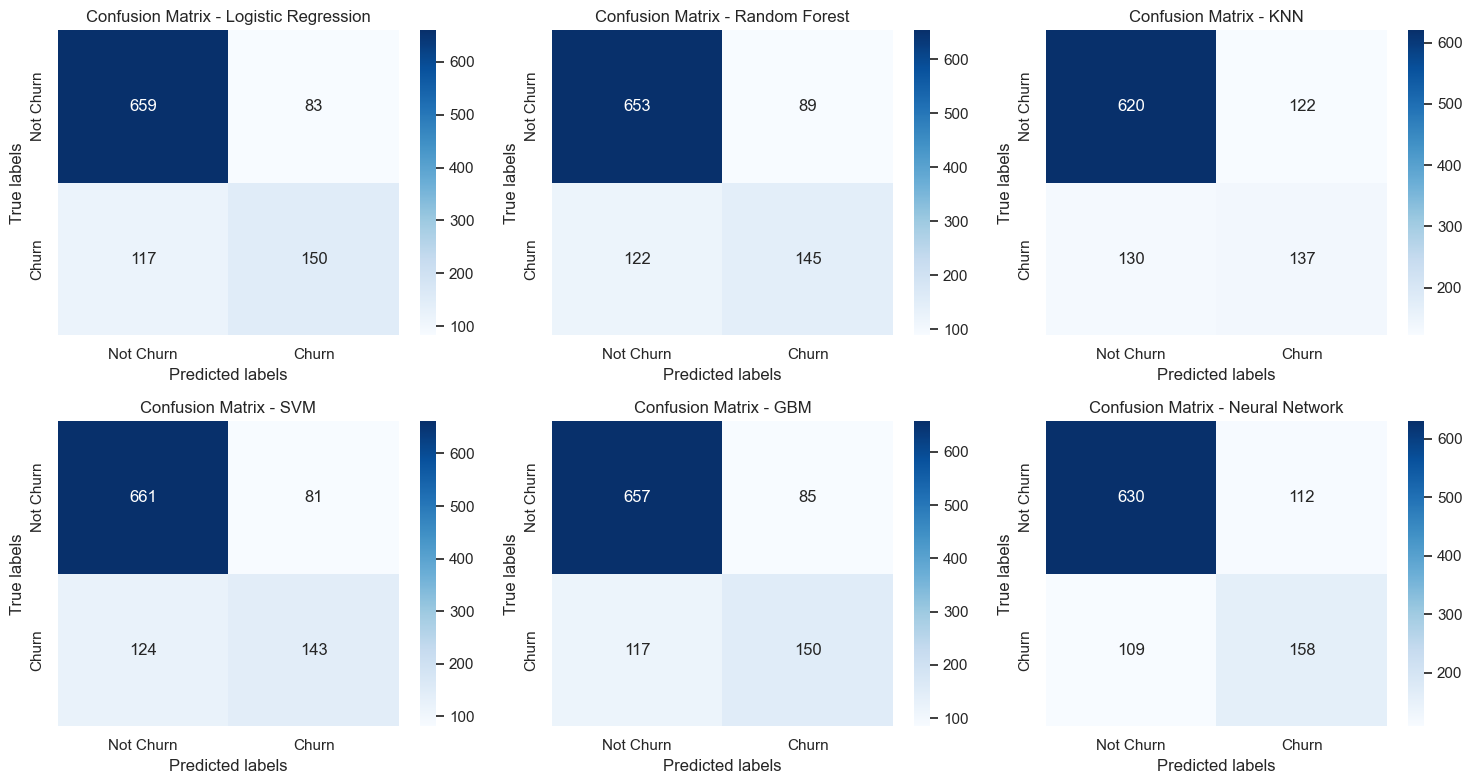

In [137]:
def plot_confusion_matrices(df_scores, figsize=(15, 8), ncols=3):
    nrows = int(np.ceil(len(df_scores) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    
    for i, (model_name, row) in enumerate(df_scores.iterrows()):
        conf_matrix = row['confusion_matrix']
        ax = axes[i]
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=ax)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'Confusion Matrix - {model_name}')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(df_scores)

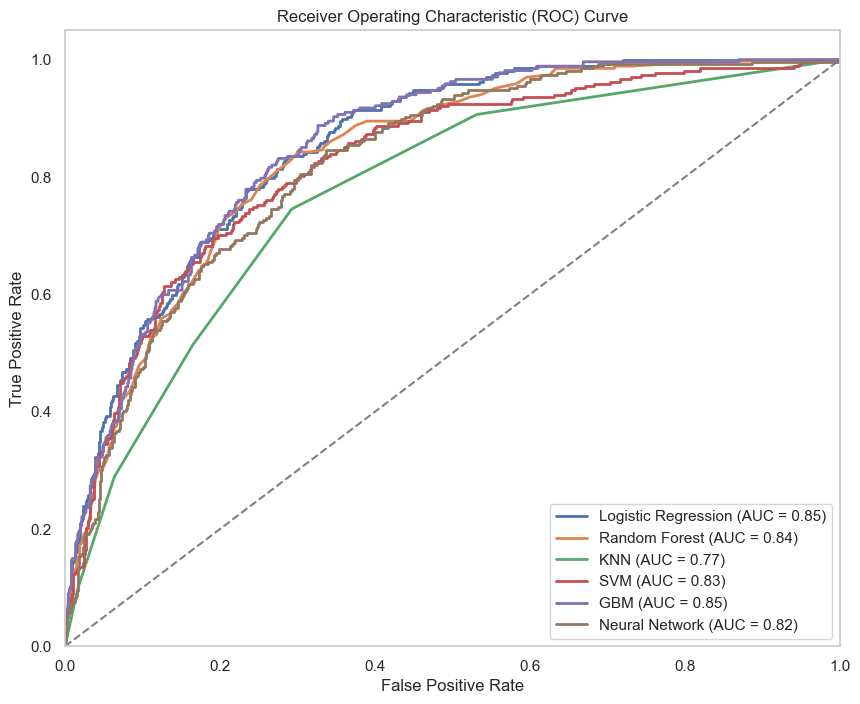

In [138]:
# Plot ROC AUC curve for all models
plt.figure(figsize=(10, 8))

# Iterate over each model's probabilities and plot ROC curve
for model_name, y_prob in model_probabilities.items():
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

#### Train on balanced data 

In [139]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True, random_state=42)),
    ('GBM', GradientBoostingClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(random_state=42))
]

In [140]:
balanced_table =pd.DataFrame(columns=['Model','Accuracy', 'Precision', 'Recall', 'F1_Score'])
balanced_pipeline= {}
 
for model_name, classifier in models:
   
    pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('OverSampler', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])
 
    pipeline.fit(X_train,y_train_encoded)
   
    balanced_pipeline [model_name]= pipeline
 
    y_pred = pipeline.predict(X_test)
 
   
    balanced_metrics= classification_report(y_test_encoded, y_pred, output_dict=True)
 
    accuracy= balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']
 
    balanced_table.loc[len(balanced_table)]= [model_name, accuracy, precision, recall,f1]
 
balanced_table.sort_values(by='F1_Score')

,Model,Accuracy,Precision,Recall,F1_Score
2,KNN,0.685828,0.757547,0.685828,0.703403
5,Neural Network,0.758176,0.774210,0.758176,0.764313
0,Logistic Regression,0.753221,0.808432,0.753221,0.766126
3,SVM,0.762141,0.793921,0.762141,0.771759
4,GBM,0.783944,0.801629,0.783944,0.790134
1,Random Forest,0.790882,0.791642,0.790882,0.791254


- After balancing Data we can notice an improvement in the F1 Scores of the Models With all models meeting the threshold creteria of 0.75 apart from KNN. 
- The best performing are Radom Forest and GBM with an F1 score of 0.791 and 0.790 respectively
- The fact that recall matches accuracy for all models suggests that your data is well-balanced across classes. This is a good sign, indicating that the balancing technique (SMOTE) has been effective 

In [141]:
# View balanced data pipelines 
balanced_pipeline ['Random Forest']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('QuantileTransformation',
                                                                   QuantileTransformer())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleI...
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MultipleServices'],
      dtype='object'))])),
                ('OverSampler', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

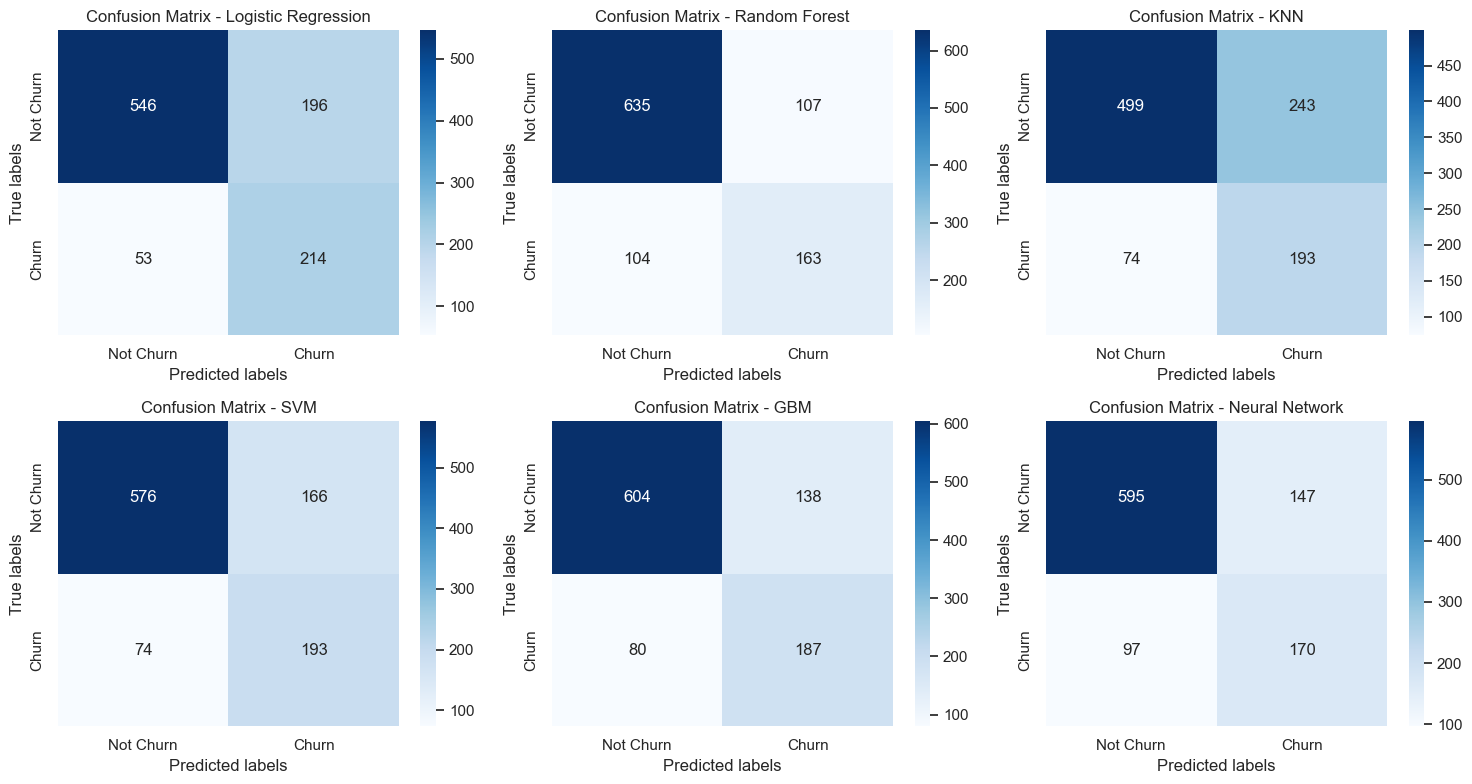

In [142]:
def plot_confusion_matrices(balanced_pipeline, X_test, y_test_encoded, figsize=(15, 8), ncols=3):
    nrows = int(np.ceil(len(balanced_pipeline) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    
    for i, (model_name, pipeline) in enumerate(balanced_pipeline.items()):
        y_pred = pipeline.predict(X_test)
        conf_matrix = confusion_matrix(y_test_encoded, y_pred)
        
        ax = axes[i]
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=ax)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'Confusion Matrix - {model_name}')
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(balanced_pipeline, X_test, y_test_encoded)

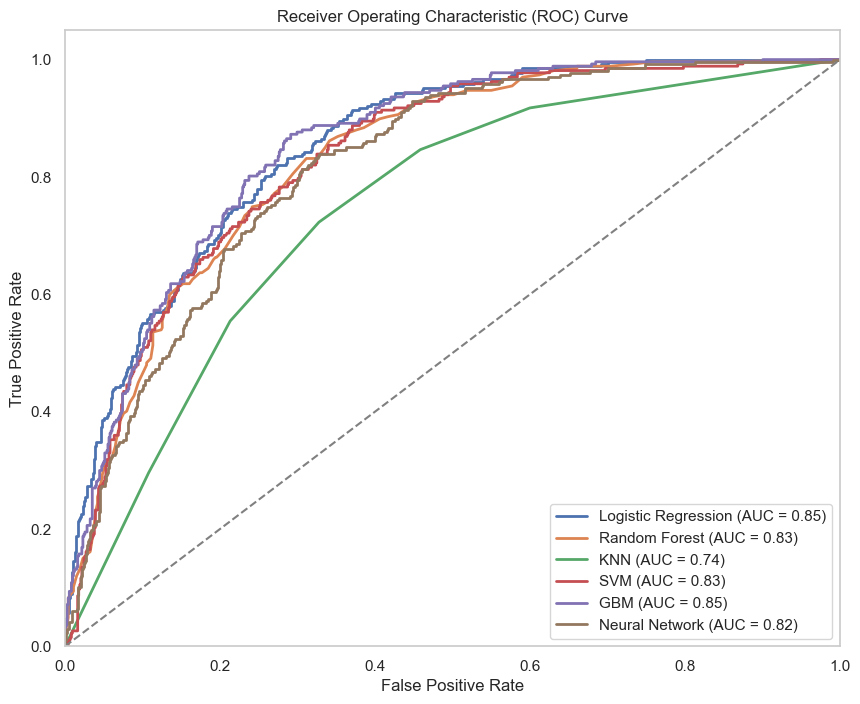

In [143]:
# Plot ROC AUC Curve for balanced pipeline
def plot_roc_auc_curves(balanced_pipeline, X_test, y_test_encoded, figsize=(10, 8)):
    plt.figure(figsize=figsize)

    # Iterate over each model in the balanced pipeline
    for model_name, pipeline in balanced_pipeline.items():
        # Get predicted probabilities
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        
        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Plot random guessing line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Set plot properties
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()

plot_roc_auc_curves(balanced_pipeline, X_test, y_test_encoded)

**Summary of Findings:**

**Model Performance Metrics:**

- Accuracy- All models achieve relatively high accuracy scores ranging from 0.686 to 0.791. This indicates that they perform well in overall prediction correctness on balanced data
-The highest performing being Random Forest with 0.790. But our target was >0.80


- Precision- Measures how many of the predicted positive instances (churn) are actually positive
-Logistic Regression and GBM show the highest precision scores around 0.808 and 0.802, respectively. Meeting the set threshold of >0.80


- Recall: Reflects how many of the actual positive instances (churn) were predicted correctly
-Random Forest achieves the highest recall score at 0.790 followed by GBM 0.784. Both do not meet threshold of >0.80



- F1-score: Balances the trade-off between precision and recall, providing a single metric to evaluate model performance
-Random Forest achieves the highest F1-score of 0.791, closely followed by GBM at 0.790 meeting the threshold of atleast 0.75

**Model Comparison and Recommendations**

Random Forest and GBM consistently perform well across all metrics (accuracy, precision, recall, and F1-score). They are particularly robust in maintaining high F1-scores, suggesting effective balance between identifying churn cases and minimizing false positives.

Logistic Regression and SVM also demonstrate strong performance with high precision scores, making them reliable choices for applications where precision in predicting churn is critical.

Neural Network shows competitive performance but slightly lower precision compared to other models, indicating potential for further optimization or tuning.

KNN exhibits the lowest recall among the models, which suggests it may struggle more with correctly identifying churn cases, especially in situations where recall is crucial.


**Conclusion:**

The ensemble methods (Random Forest and GBM) stand out for their balanced performance across all metrics on balanced data. They are recommended for applications where F1 Score is the highest consideration like in this case. And therefore moving forwward we will fine tune this 2 to ensure maximum performance and the one with best performance we will use to test our test dataset

Logistic Regression and SVM offer strong precision and are suitable for scenarios prioritizing precision in churn prediction.

Neural Network shows promise but may benefit from further fine-tuning to improve precision and overall performance.

**Saving our models for future use before the hyperparameter tuning as after tuning we realize that the scores reduce. In any project the scores before hyperparameter tuning can be used if the hyperparameter runing underperforms**

In [146]:
rf_model = RandomForestClassifier
gbm_model = GradientBoostingClassifier
svm_model = SVC

# Create a folder named 'models' if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the Random Forest model
joblib.dump(rf_model, 'models/random_forest_model.joblib')

# Save the GBM model
joblib.dump(gbm_model, 'models/gbm_model.joblib')

# Save the SVM model
joblib.dump(svm_model, 'models/svm_model.joblib')


['models/svm_model.joblib']

#### **Perform Hyperparameter Tuning** 

- For this we selected the top performing models which are GBM and Random Forest Classification and see which one best performs after hyperparameter tuning in order to  pick the best performing model 

-GBM HYPERPARAMETER TUNING

In [72]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }
    
    model = GradientBoostingClassifier(**params, random_state=42)
    
    pipeline = imbPipeline([
        ('preprocessor', preprocessor),
        ('oversampler', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    try:
        score = cross_val_score(pipeline, X_train, y_train_encoded, cv=5, scoring='f1_weighted', error_score='raise').mean()
    except Exception as e:
        print(f"Error in trial with parameters: {params}")
        print(f"Error message: {str(e)}")
        return float('-inf')  # Return a very low score to indicate failure
    
    return score

# Create and run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_f1_score = study.best_value

print("Best Parameters:", best_params)
print("Best F1-Score:", best_f1_score)


[I 2024-09-18 10:52:24,574] A new study created in memory with name: no-name-5eb132ce-de88-49c5-b142-66d951f62ef2
[I 2024-09-18 10:52:25,035] Trial 0 finished with value: -inf and parameters: {'n_estimators': 146, 'learning_rate': 0.04819973684204508, 'max_depth': 23, 'min_samples_split': 5, 'min_samples_leaf': 7, 'subsample': 0.76394273564023, 'max_features': 'auto'}. Best is trial 0 with value: -inf.


Error in trial with parameters: {'n_estimators': 146, 'learning_rate': 0.04819973684204508, 'max_depth': 23, 'min_samples_split': 5, 'min_samples_leaf': 7, 'subsample': 0.76394273564023, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-18 10:52:25,378] Trial 1 finished with value: -inf and parameters: {'n_estimators': 654, 'learning_rate': 0.7894541270018035, 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 14, 'subsample': 0.6937561001438224, 'max_features': 'auto'}. Best is trial 0 with value: -inf.


Error in trial with parameters: {'n_estimators': 654, 'learning_rate': 0.7894541270018035, 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 14, 'subsample': 0.6937561001438224, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-18 10:52:42,858] Trial 2 finished with value: 0.7594902832049495 and parameters: {'n_estimators': 316, 'learning_rate': 0.40460521795158694, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 11, 'subsample': 0.6909971597049658, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.7594902832049495.
[I 2024-09-18 10:53:18,585] Trial 3 finished with value: 0.790872406935794 and parameters: {'n_estimators': 162, 'learning_rate': 0.0021601505653159807, 'max_depth': 24, 'min_samples_split': 9, 'min_samples_leaf': 12, 'subsample': 0.8191874034938069, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.790872406935794.
[I 2024-09-18 10:53:18,857] Trial 4 finished with value: -inf and parameters: {'n_estimators': 519, 'learning_rate': 0.10123464855947438, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 7, 'subsample': 0.9310285166011412, 'max_features': 'auto'}. Best is trial 3 with value: 0.790872406935794.


Error in trial with parameters: {'n_estimators': 519, 'learning_rate': 0.10123464855947438, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 7, 'subsample': 0.9310285166011412, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-18 10:54:12,564] Trial 5 finished with value: 0.7395547250036081 and parameters: {'n_estimators': 127, 'learning_rate': 0.5372140375103841, 'max_depth': 24, 'min_samples_split': 9, 'min_samples_leaf': 4, 'subsample': 0.7549285220737716, 'max_features': 'log2'}. Best is trial 3 with value: 0.790872406935794.
[I 2024-09-18 10:56:51,410] Trial 6 finished with value: 0.7895387721624603 and parameters: {'n_estimators': 585, 'learning_rate': 0.007807535057411456, 'max_depth': 28, 'min_samples_split': 11, 'min_samples_leaf': 9, 'subsample': 0.8369635047276484, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.790872406935794.
[I 2024-09-18 10:57:16,230] Trial 7 finished with value: 0.7842925607803654 and parameters: {'n_estimators': 179, 'learning_rate': 0.005261564116173018, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 7, 'subsample': 0.8769726811894172, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.790872406935794.
[I 2024-09-18 10:58:11,607] Trial 8 

Error in trial with parameters: {'n_estimators': 306, 'learning_rate': 0.0035393864597238816, 'max_depth': 29, 'min_samples_split': 9, 'min_samples_leaf': 16, 'subsample': 0.6618211248143422, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-18 10:59:07,649] Trial 10 finished with value: 0.7881661199034674 and parameters: {'n_estimators': 891, 'learning_rate': 0.0010024459348575059, 'max_depth': 21, 'min_samples_split': 16, 'min_samples_leaf': 20, 'subsample': 0.5227668292711058, 'max_features': 'log2'}. Best is trial 3 with value: 0.790872406935794.
[I 2024-09-18 11:00:16,087] Trial 11 finished with value: 0.7911626302032857 and parameters: {'n_estimators': 602, 'learning_rate': 0.006440379217329904, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 12, 'subsample': 0.8538350766683667, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.7911626302032857.
[I 2024-09-18 11:02:08,085] Trial 12 finished with value: 0.7917670089364102 and parameters: {'n_estimators': 769, 'learning_rate': 0.001043633665251875, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 13, 'subsample': 0.9719643686195194, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.7917670089364102.
[I 2024-09-18 11:03:59

Error in trial with parameters: {'n_estimators': 641, 'learning_rate': 0.020377107150514037, 'max_depth': 23, 'min_samples_split': 20, 'min_samples_leaf': 16, 'subsample': 0.815077906466187, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-18 11:25:04,530] Trial 30 finished with value: -inf and parameters: {'n_estimators': 895, 'learning_rate': 0.003215690987904469, 'max_depth': 17, 'min_samples_split': 12, 'min_samples_leaf': 18, 'subsample': 0.8971384685091804, 'max_features': 'auto'}. Best is trial 20 with value: 0.7937981955994167.


Error in trial with parameters: {'n_estimators': 895, 'learning_rate': 0.003215690987904469, 'max_depth': 17, 'min_samples_split': 12, 'min_samples_leaf': 18, 'subsample': 0.8971384685091804, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-18 11:26:52,441] Trial 31 finished with value: 0.7915182400388033 and parameters: {'n_estimators': 772, 'learning_rate': 0.0015536430676389246, 'max_depth': 26, 'min_samples_split': 5, 'min_samples_leaf': 13, 'subsample': 0.9641646296686274, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7937981955994167.
[I 2024-09-18 11:28:19,585] Trial 32 finished with value: 0.7911096673514905 and parameters: {'n_estimators': 692, 'learning_rate': 0.0016937009886651966, 'max_depth': 22, 'min_samples_split': 8, 'min_samples_leaf': 14, 'subsample': 0.9200182527187987, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7937981955994167.
[I 2024-09-18 11:29:32,846] Trial 33 finished with value: 0.7916328664358993 and parameters: {'n_estimators': 763, 'learning_rate': 0.0014431385581583933, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 15, 'subsample': 0.7314233778272872, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7937981955994167.
[I 2024-09-18 11:31

Error in trial with parameters: {'n_estimators': 544, 'learning_rate': 0.004634337117047044, 'max_depth': 24, 'min_samples_split': 12, 'min_samples_leaf': 12, 'subsample': 0.8339691527047792, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-18 11:34:12,317] Trial 37 finished with value: 0.7705675873870896 and parameters: {'n_estimators': 655, 'learning_rate': 0.028857941149317803, 'max_depth': 27, 'min_samples_split': 10, 'min_samples_leaf': 10, 'subsample': 0.7767163032349821, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7937981955994167.
[I 2024-09-18 11:36:17,427] Trial 38 finished with value: 0.7826980265777823 and parameters: {'n_estimators': 685, 'learning_rate': 0.01034325099263938, 'max_depth': 24, 'min_samples_split': 10, 'min_samples_leaf': 8, 'subsample': 0.8721663804948708, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7937981955994167.
[I 2024-09-18 11:36:55,803] Trial 39 finished with value: 0.791016079762453 and parameters: {'n_estimators': 365, 'learning_rate': 0.004976186836164951, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 17, 'subsample': 0.8444493102365221, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7937981955994167.
[I 2024-09-18 11:36:55,

Error in trial with parameters: {'n_estimators': 569, 'learning_rate': 0.007304535828212569, 'max_depth': 23, 'min_samples_split': 16, 'min_samples_leaf': 4, 'subsample': 0.7348743852286372, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-18 11:38:50,130] Trial 41 finished with value: 0.7908968921472826 and parameters: {'n_estimators': 769, 'learning_rate': 0.001769023590563703, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 12, 'subsample': 0.9328337918509773, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7937981955994167.
[I 2024-09-18 11:40:32,344] Trial 42 finished with value: 0.7694920565038978 and parameters: {'n_estimators': 846, 'learning_rate': 0.10742753071758743, 'max_depth': 28, 'min_samples_split': 8, 'min_samples_leaf': 15, 'subsample': 0.8881260629983118, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7937981955994167.
[I 2024-09-18 11:41:59,097] Trial 43 finished with value: 0.791024792982521 and parameters: {'n_estimators': 617, 'learning_rate': 0.0012560504951233354, 'max_depth': 22, 'min_samples_split': 9, 'min_samples_leaf': 13, 'subsample': 0.9671453736185451, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7937981955994167.
[I 2024-09-18 11:43:29,

Error in trial with parameters: {'n_estimators': 251, 'learning_rate': 0.001802017553055206, 'max_depth': 19, 'min_samples_split': 10, 'min_samples_leaf': 2, 'subsample': 0.7016368197143963, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-18 12:20:20,764] Trial 86 finished with value: 0.7944581652781656 and parameters: {'n_estimators': 317, 'learning_rate': 0.0014306588813819343, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 3, 'subsample': 0.721767911539327, 'max_features': 'log2'}. Best is trial 70 with value: 0.7964162916454309.
[I 2024-09-18 12:22:19,608] Trial 87 finished with value: 0.7905717081349556 and parameters: {'n_estimators': 321, 'learning_rate': 0.0013716973220937716, 'max_depth': 22, 'min_samples_split': 8, 'min_samples_leaf': 1, 'subsample': 0.7221397209829468, 'max_features': 'log2'}. Best is trial 70 with value: 0.7964162916454309.
[I 2024-09-18 12:23:04,517] Trial 88 finished with value: 0.7921641326688005 and parameters: {'n_estimators': 168, 'learning_rate': 0.0018963167576468017, 'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 2, 'subsample': 0.7464270777664974, 'max_features': 'log2'}. Best is trial 70 with value: 0.7964162916454309.
[I 2024-09-18 12:23:51,

Error in trial with parameters: {'n_estimators': 197, 'learning_rate': 0.0010287722119559025, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'subsample': 0.811869704827751, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-18 12:30:24,178] Trial 97 finished with value: 0.7922210388285282 and parameters: {'n_estimators': 367, 'learning_rate': 0.0011999576958766191, 'max_depth': 17, 'min_samples_split': 11, 'min_samples_leaf': 4, 'subsample': 0.8060695810267042, 'max_features': 'log2'}. Best is trial 70 with value: 0.7964162916454309.
[I 2024-09-18 12:32:23,307] Trial 98 finished with value: 0.7921472711263491 and parameters: {'n_estimators': 303, 'learning_rate': 0.0015630279557018686, 'max_depth': 23, 'min_samples_split': 9, 'min_samples_leaf': 1, 'subsample': 0.7209586136897923, 'max_features': 'log2'}. Best is trial 70 with value: 0.7964162916454309.
[I 2024-09-18 12:32:34,548] Trial 99 finished with value: 0.7850542632580626 and parameters: {'n_estimators': 262, 'learning_rate': 0.13097755693202298, 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 6, 'subsample': 0.8271656278743482, 'max_features': 'log2'}. Best is trial 70 with value: 0.7964162916454309.


Best Parameters: {'n_estimators': 279, 'learning_rate': 0.003859105606786461, 'max_depth': 18, 'min_samples_split': 12, 'min_samples_leaf': 2, 'subsample': 0.7013106094487579, 'max_features': 'log2'}
Best F1-Score: 0.7964162916454309


Observations 
- The error message Error messages in the trials was later reaslised is because of the 'max_features' parameter was set to 'auto', which is not a valid option for the cross_val_score function in scikit-learn. And we'll be moving to correct this moving forward

- Optimization Progress: Despite encountering errors in some trials, the study continued to run and completed all 100 trials as specified (n_trials=100).

- The best F1-score observed during the study was 0.794, achieved in Trial 63 which was a slight improvement from 0.790

-RANDOM FOREST HYPERPARAMETER TUNING

In [73]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 30),
    }
    model = RandomForestClassifier(**params)
    pipeline = imbPipeline([
        ('preprocessor', preprocessor),
        ('oversampler', SMOTE()),
        ('classifier', model)
    ])
    score = cross_val_score(pipeline, X_train, y_train_encoded, cv=5, scoring='f1').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_f1_score = study.best_value

print("Best Parameters:", best_params)
print("Best F1-Score:", best_f1_score)


[I 2024-09-18 12:32:34,716] A new study created in memory with name: no-name-74173c5a-557d-4dbe-a9b2-4234b01660ae
[I 2024-09-18 12:33:00,019] Trial 0 finished with value: 0.6193193242731322 and parameters: {'n_estimators': 568, 'max_depth': 11}. Best is trial 0 with value: 0.6193193242731322.
[I 2024-09-18 12:33:10,451] Trial 1 finished with value: 0.6059883604251508 and parameters: {'n_estimators': 181, 'max_depth': 18}. Best is trial 0 with value: 0.6193193242731322.
[I 2024-09-18 12:33:17,171] Trial 2 finished with value: 0.600653581041348 and parameters: {'n_estimators': 111, 'max_depth': 25}. Best is trial 0 with value: 0.6193193242731322.
[I 2024-09-18 12:34:00,751] Trial 3 finished with value: 0.6029216584163597 and parameters: {'n_estimators': 820, 'max_depth': 21}. Best is trial 0 with value: 0.6193193242731322.
[I 2024-09-18 12:34:37,052] Trial 4 finished with value: 0.597331883208073 and parameters: {'n_estimators': 671, 'max_depth': 26}. Best is trial 0 with value: 0.619319

Best Parameters: {'n_estimators': 164, 'max_depth': 6}
Best F1-Score: 0.643422672895875


Observation
- Trial Number: Trial 99 indicates that this was the 99th trial conducted during the optimization process.
- Trial Result: The F1-score observed for this trial was 0.635314351632384.
- Trial Parameters: The hyperparameters tested during this trial were {'n_estimators': 335, 'max_depth': 9}.
- Best Trial: The best F1-score observed overall throughout all trials was 0.6424022851349124, achieved in Trial 40.

- From an initial F1 Score of 0.791 to 0.644 is a drop we will be adjusting the hyperparameters for better performance of the tuning

#### **Challanges and Moving Forward**

- The only Major Challange was with the hyperparameter tunings of our 2 best performing models which we will seek to work it out with the best hyperparameters so that we can move forward to sellecting the best model for our test data
- Other Challanges were learning oportnities.
- We will also be exporting core machine learning Components for future use in other projects 


**Exporting the Models for use in making our Multipages web based APP**
- The two models will be
 
-GBM

-Random forest